In [64]:
import numpy as np
import pandas as pd

Reading dataset

In [65]:
from sklearn.utils import shuffle
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df=shuffle(df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2533,45627,Male,60.0,0,0,Yes,Private,Rural,70.52,26.5,formerly smoked,0
3329,38560,Male,47.0,0,0,Yes,Private,Rural,72.20,33.0,Unknown,0
2974,32457,Male,62.0,0,0,Yes,Private,Urban,96.37,30.7,formerly smoked,0
3033,21192,Female,78.0,0,0,Yes,Private,Urban,93.15,23.6,Unknown,0
809,64633,Female,48.0,0,0,Yes,Private,Urban,94.04,32.7,never smoked,0


#Step 1: Removing unnecessary columns from dataset / Feature Selection Technique.


In [66]:
df.drop('id',axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2533,Male,60.0,0,0,Yes,Private,Rural,70.52,26.5,formerly smoked,0
3329,Male,47.0,0,0,Yes,Private,Rural,72.20,33.0,Unknown,0
2974,Male,62.0,0,0,Yes,Private,Urban,96.37,30.7,formerly smoked,0
3033,Female,78.0,0,0,Yes,Private,Urban,93.15,23.6,Unknown,0
809,Female,48.0,0,0,Yes,Private,Urban,94.04,32.7,never smoked,0


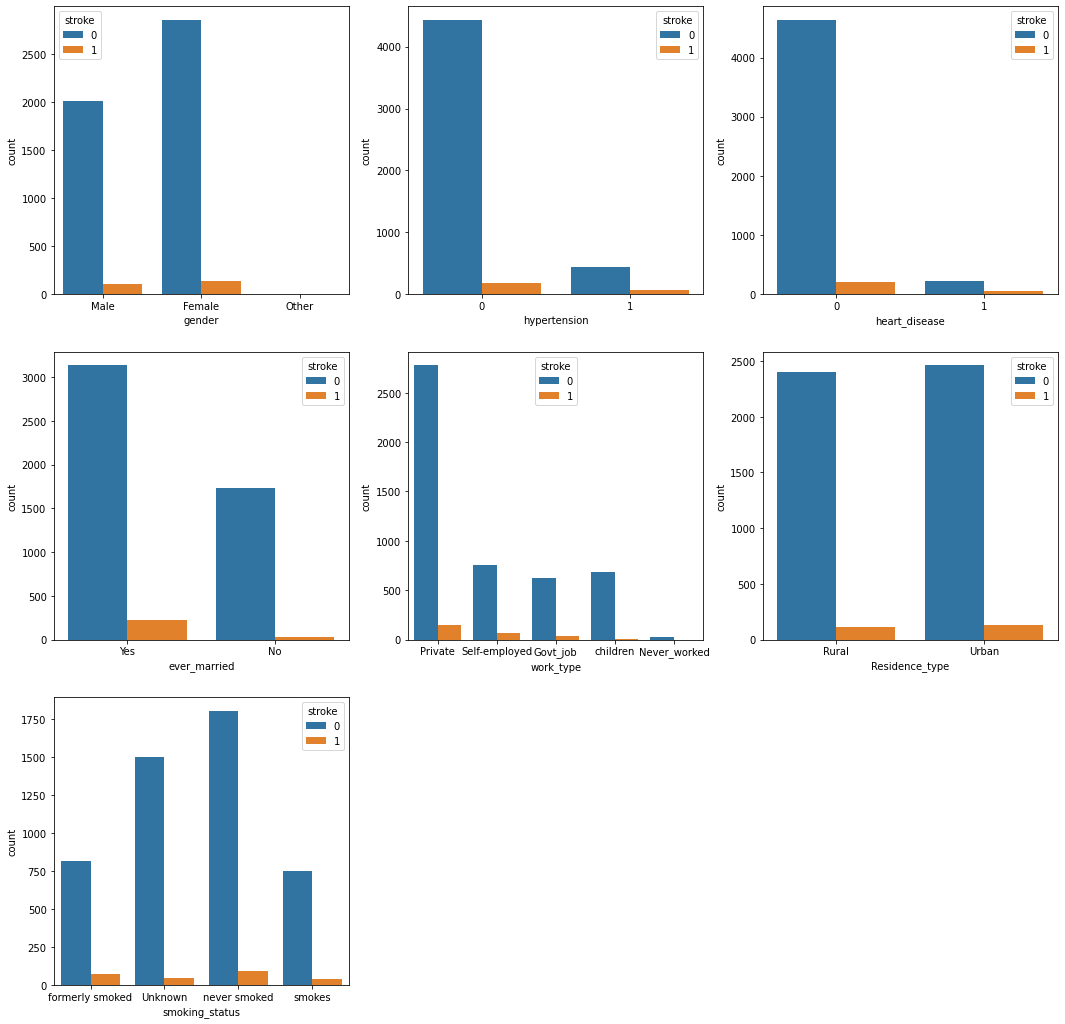

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 18))
fig.delaxes( ax=axes[2,1])
fig.delaxes( ax=axes[2,2])


sns.countplot(x="gender", hue='stroke', palette='tab10', data=df , ax=axes[0,0])
sns.countplot(x="hypertension", hue='stroke', palette="tab10", data=df , ax=axes[0,1])
sns.countplot(x="heart_disease", hue='stroke', palette="tab10", data=df , ax=axes[0,2])
sns.countplot(x="ever_married", hue='stroke', palette="tab10", data=df , ax=axes[1,0])
sns.countplot(x="work_type", hue='stroke', palette="tab10", data=df , ax=axes[1,1])
sns.countplot(x="Residence_type", hue='stroke', palette="tab10", data=df , ax=axes[1,2])
sns.countplot(x="smoking_status", hue='stroke', palette="tab10", data=df , ax=axes[2,0])


plt.show()

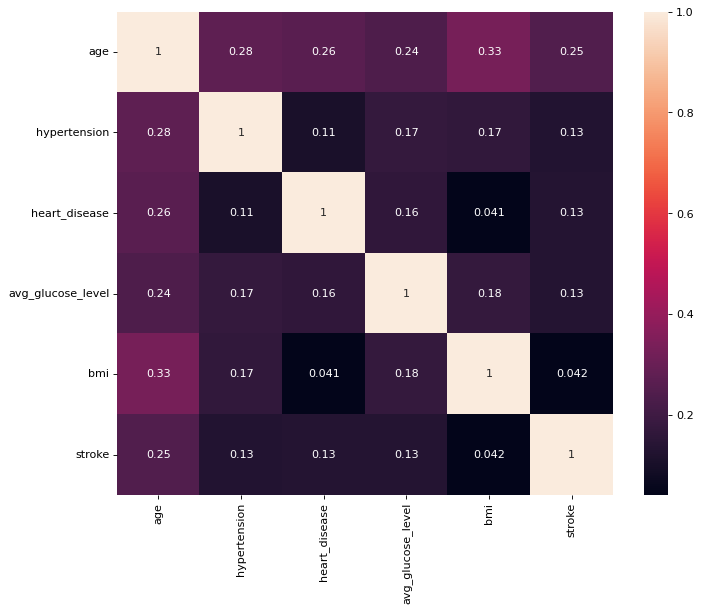

In [68]:
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(data=df.corr(),cmap='rocket',cbar=True,robust=False,annot=True)

#Step 2: Search for null values in all columns and fill it with mean

In [69]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

hence BMI has 201 null values so let's handle it by filling it with mean

In [70]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [71]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2533,Male,60.0,0,0,Yes,Private,Rural,70.52,26.5,formerly smoked,0
3329,Male,47.0,0,0,Yes,Private,Rural,72.20,33.0,Unknown,0
2974,Male,62.0,0,0,Yes,Private,Urban,96.37,30.7,formerly smoked,0
3033,Female,78.0,0,0,Yes,Private,Urban,93.15,23.6,Unknown,0
809,Female,48.0,0,0,Yes,Private,Urban,94.04,32.7,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4740,Male,60.0,0,0,Yes,Private,Rural,234.45,36.8,formerly smoked,0
2066,Female,30.0,0,0,Yes,Private,Urban,75.88,32.8,Unknown,0
721,Female,28.0,0,0,No,Private,Rural,84.59,23.5,Unknown,0
1264,Female,38.0,0,0,Yes,Private,Urban,69.34,43.7,never smoked,0


Now the BMI null values are filled with the mean 28.89

#Searching for duplicate records

In [72]:
df[df.duplicated()].value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []>

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 2533 to 3532
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.1+ KB


#Step 3: Moving towards outliers

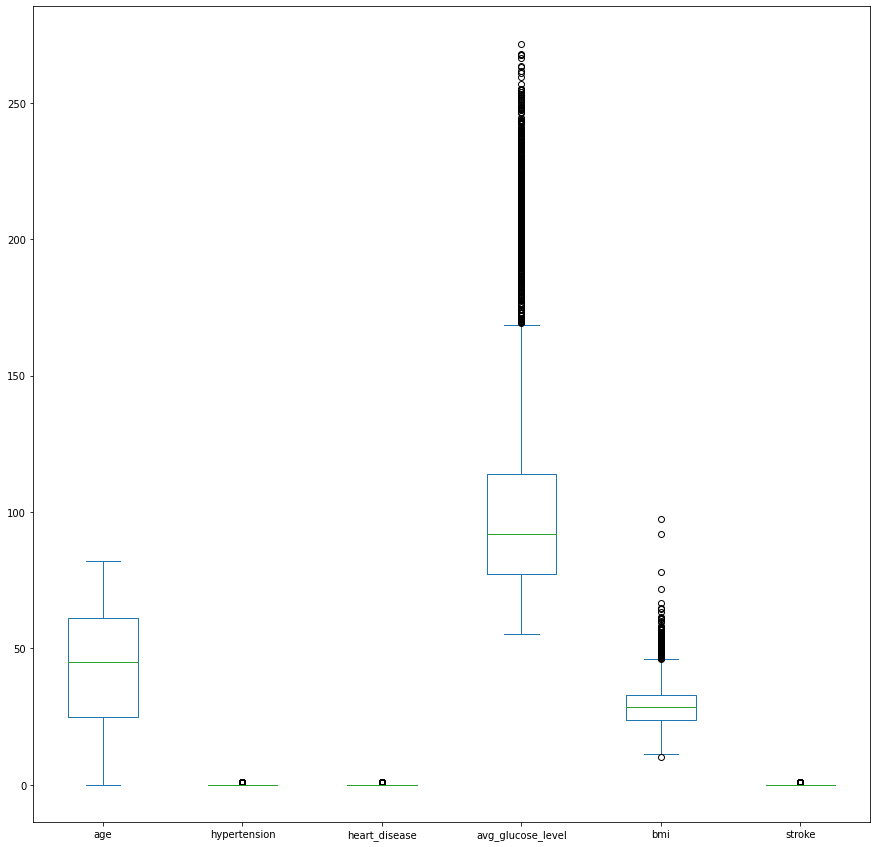

In [74]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15,15)
df.plot(kind="box")
plt.show()

#outliers found in average gulocose level, let's found the statistics

In [75]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [76]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [77]:
print(df[df['bmi']>70.00])
# Drop rows
df.drop(df.index[df['bmi'] > 70], inplace=True)
# Reset index of dataframe
df = df.reset_index(drop = True)

      gender   age  hypertension  heart_disease ever_married work_type  \
928   Female  23.0             1              0           No   Private   
2128    Male  17.0             1              0           No   Private   
4209    Male  38.0             1              0          Yes   Private   
544     Male  42.0             0              0          Yes   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
928           Urban              70.03  78.0         smokes       0  
2128          Rural              61.67  97.6        Unknown       0  
4209          Rural              56.90  92.0   never smoked       0  
544           Rural             210.48  71.9   never smoked       0  


#Label Encoding the data

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
gender = encoder.fit_transform(df["gender"])
ever_married= encoder.fit_transform(df["ever_married"])
work_type= encoder.fit_transform(df["work_type"])
Residence_type=encoder.fit_transform(df["Residence_type"])
smoking_status= encoder.fit_transform(df["smoking_status"])

In [79]:
df["gender"]=gender
df["ever_married"]=ever_married
df["work_type"]=work_type
df["Residence_type"]=Residence_type
df["smoking_status"]=smoking_status

In [80]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,60.0,0,0,1,2,0,70.52,26.5,1,0
1,1,47.0,0,0,1,2,0,72.20,33.0,0,0
2,1,62.0,0,0,1,2,1,96.37,30.7,1,0
3,0,78.0,0,0,1,2,1,93.15,23.6,0,0
4,0,48.0,0,0,1,2,1,94.04,32.7,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5101,1,60.0,0,0,1,2,0,234.45,36.8,1,0
5102,0,30.0,0,0,1,2,1,75.88,32.8,0,0
5103,0,28.0,0,0,0,2,0,84.59,23.5,0,0
5104,0,38.0,0,0,1,2,1,69.34,43.7,2,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5106 non-null   int64  
 1   age                5106 non-null   float64
 2   hypertension       5106 non-null   int64  
 3   heart_disease      5106 non-null   int64  
 4   ever_married       5106 non-null   int64  
 5   work_type          5106 non-null   int64  
 6   Residence_type     5106 non-null   int64  
 7   avg_glucose_level  5106 non-null   float64
 8   bmi                5106 non-null   float64
 9   smoking_status     5106 non-null   int64  
 10  stroke             5106 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 438.9 KB


# Spliting in train Test

In [82]:
X=df.drop('stroke', axis=1)
Y=df['stroke']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

#finding data imbalance

In [84]:
lis=df['stroke'].value_counts();
print((lis[0]+lis[1]),"Total Records")
print(lis[0], "Not Stroke")
print(lis[1],"Stroke")

5106 Total Records
4857 Not Stroke
249 Stroke


In [85]:
print(X_train)
print(Y_train)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
874        1  63.0             0              0             1          2   
2228       1  32.0             0              0             1          2   
5102       0  30.0             0              0             1          2   
3385       0  66.0             0              0             1          2   
1375       0  65.0             0              0             1          3   
...      ...   ...           ...            ...           ...        ...   
2895       0  53.0             0              0             1          3   
2763       0  46.0             0              0             1          2   
905        1  74.0             0              0             1          2   
3980       0  61.0             0              0             1          2   
235        1  32.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
874                0   

#upsample the data

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [87]:
print(X_train)
print(Y_train)

      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  63.000000             0              0             1          2   
1          1  32.000000             0              0             1          2   
2          0  30.000000             0              0             1          2   
3          0  66.000000             0              0             1          2   
4          0  65.000000             0              0             1          3   
...      ...        ...           ...            ...           ...        ...   
7787       0  72.042081             0              0             1          2   
7788       0  75.297040             0              0             1          2   
7789       0  55.123917             0              0             1          2   
7790       0  79.633005             0              0             1          1   
7791       0  69.467389             1              0             1          3   

      Residence_type  avg_g

#Normalization

In [88]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,0.414023,43.236976,0.096945,0.054054,0.656287,2.167842,0.508226,106.152673,28.849381,1.376616,0.048766
std,0.492998,22.616627,0.295912,0.226146,0.474993,1.090710,0.499981,45.265408,7.534221,1.071468,0.215400
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.282500,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.890000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,66.800000,3.000000,1.000000


In [89]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [90]:
X_train_std =std.fit_transform(X_train)
X_test_std =std.transform(X_test)

In [91]:
print("X_train :",X_train_std)
print("X_test :",X_test_std)

X_train : [[ 1.3640015   0.34817223 -0.30294431 ... -1.10723824 -0.05842298
  -0.27045562]
 [ 1.3640015  -1.05004112 -0.30294431 ... -0.37274474  1.70130793
   1.78653819]
 [-0.73231008 -1.14024843 -0.30294431 ... -0.77668871  0.55902646
  -1.29895252]
 ...
 [-0.73231008 -0.00706792 -0.30294431 ... -0.95341418  0.08087831
  -1.29895252]
 [-0.73231008  1.09838156 -0.30294431 ...  1.24656642 -0.05335674
   0.75804129]
 [-0.73231008  0.63987513  3.30093672 ...  1.58561063 -0.32048528
   0.75804129]]
X_test : [[ 1.3640015  -1.63638865 -0.30294431 ... -0.42344364 -0.66043619
   1.78653819]
 [-0.73231008 -1.72659596 -0.30294431 ... -0.88412646  2.13352254
  -1.29895252]
 [-0.73231008 -1.95211425 -0.30294431 ... -0.88193012 -1.75640895
  -1.29895252]
 ...
 [-0.73231008 -2.22273619 -0.30294431 ... -0.84642258 -1.49399294
  -1.29895252]
 [ 1.3640015   0.03244664 -0.30294431 ... -0.65735411  0.26573797
   1.78653819]
 [-0.73231008 -1.23045574 -0.30294431 ... -0.12895073 -1.55573788
   1.78653819

#Modeling

In [92]:
from sklearn.tree import DecisionTreeClassifier # 1. Decision Tree Classifiers
from sklearn.linear_model import LogisticRegression #2. logistic Regression Classifiers
from sklearn.neighbors import KNeighborsClassifier # 3. KNN classifier
from sklearn.ensemble import RandomForestClassifier #4. Random Forest Classifier 
from sklearn.svm import SVC # 5. Support Vector Machine
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.metrics import confusion_matrix,accuracy_score # Confusion Matrix and accuracy score
from sklearn.metrics import classification_report # Classification report for further metrics


#1.Decision Tree classifier, confusion matrix and classification report

In [93]:
dt=DecisionTreeClassifier()
dt.fit(X_train_std, Y_train)
Y_pred=dt.predict(X_test_std)
prob_DT=dt.predict_proba(X_test_std)[:,1]
dt_acc=accuracy_score(Y_test,Y_pred)
dt_acc


0.8561643835616438

In [94]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,857,104,961
1,43,18,61
All,900,122,1022


In [95]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       961
           1       0.15      0.30      0.20        61

    accuracy                           0.86      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.90      0.86      0.88      1022



#Logistic Regression classifier, , confusion matrix and classification report

In [96]:
LR = LogisticRegression()
LR.fit(X_train_std, Y_train)
Y_pred=LR.predict(X_test_std)
prob_LR = LR.predict_proba(X_test_std)[:,1]
lr_acc=accuracy_score(Y_test,Y_pred)
lr_acc

0.7808219178082192

In [97]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,758,203,961
1,21,40,61
All,779,243,1022


In [98]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       961
           1       0.16      0.66      0.26        61

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.92      0.78      0.83      1022



#KNN, confusion matrix and classification report

In [99]:
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
Y_pred=knn.predict(X_test_std)
prob_KNN = knn.predict_proba(X_test_std)[:,1]

knn_acc=accuracy_score(Y_test,Y_pred)
knn_acc

0.8003913894324853

In [100]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,789,172,961
1,32,29,61
All,821,201,1022


In [101]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       961
           1       0.14      0.48      0.22        61

    accuracy                           0.80      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.91      0.80      0.85      1022



# Random Forest, confusion matrix and classification report

In [102]:
rf=RandomForestClassifier()
rf.fit(X_train_std,Y_train)
Y_pred=rf.predict(X_test_std)
prob_RF = rf.predict_proba(X_test_std)[:,1]
rf_acc=accuracy_score(Y_test,Y_pred)
rf_acc

0.8943248532289628

In [103]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,899,62,961
1,46,15,61
All,945,77,1022


In [104]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       961
           1       0.19      0.25      0.22        61

    accuracy                           0.89      1022
   macro avg       0.57      0.59      0.58      1022
weighted avg       0.91      0.89      0.90      1022



# Support Vector Machine (SVM), confusion matrix and classification report

In [105]:
sv = SVC(probability=True)
sv.fit(X_train_std,Y_train)
Y_pred=sv.predict(X_test_std)
prob_SVC = sv.predict_proba(X_test_std)[:,1]
svm_acc=accuracy_score(Y_test,Y_pred)
svm_acc

0.8013698630136986

In [106]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,785,176,961
1,27,34,61
All,812,210,1022


In [107]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       961
           1       0.16      0.56      0.25        61

    accuracy                           0.80      1022
   macro avg       0.56      0.69      0.57      1022
weighted avg       0.92      0.80      0.85      1022



# Naive Bayes, confusion matrix and classification report

In [108]:
NB = GaussianNB()
NB.fit(X_train_std, Y_train)
Y_pred=NB.predict(X_test_std)
prob_NB = NB.predict_proba(X_test_std)[:,1]
NB_acc=accuracy_score(Y_test, Y_pred)
NB_acc

0.7093933463796478

In [109]:
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,678,283,961
1,14,47,61
All,692,330,1022


In [110]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       961
           1       0.14      0.77      0.24        61

    accuracy                           0.71      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.93      0.71      0.79      1022



In [111]:
print(dt_acc)
print(lr_acc)
print(knn_acc)
print(rf_acc)
print(svm_acc)
print(NB_acc)

0.8561643835616438
0.7808219178082192
0.8003913894324853
0.8943248532289628
0.8013698630136986
0.7093933463796478


<BarContainer object of 6 artists>

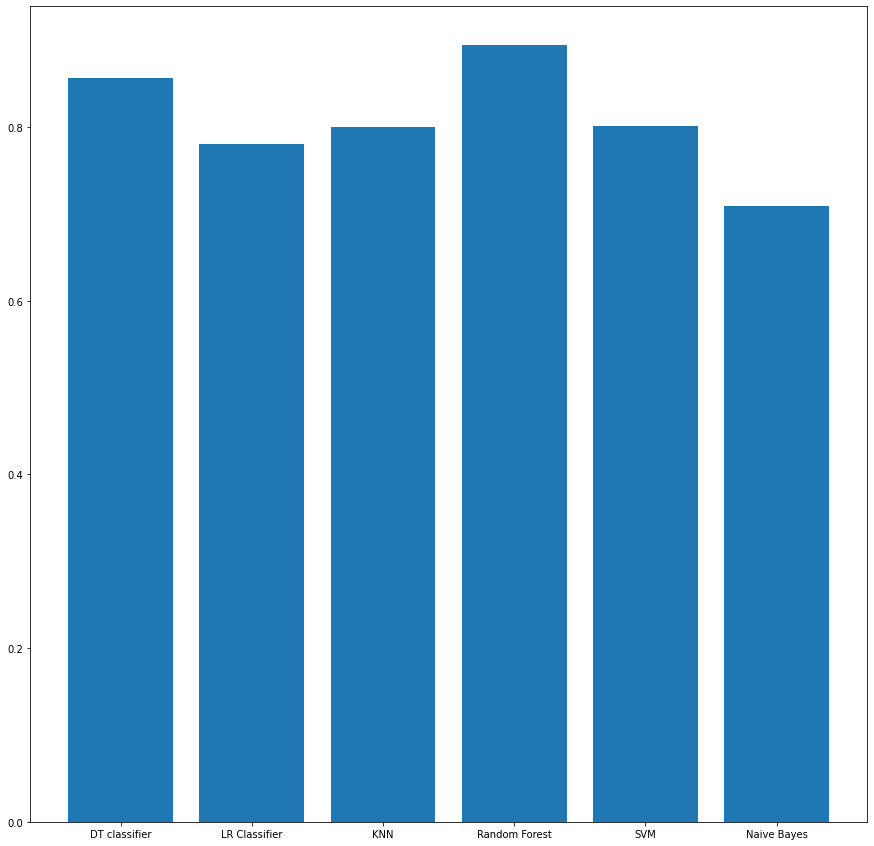

In [112]:
plt.bar(['DT classifier','LR Classifier','KNN', 'Random Forest', 'SVM', 'Naive Bayes'],[dt_acc,lr_acc,knn_acc, rf_acc, svm_acc, NB_acc])

# AUC ROC Curve

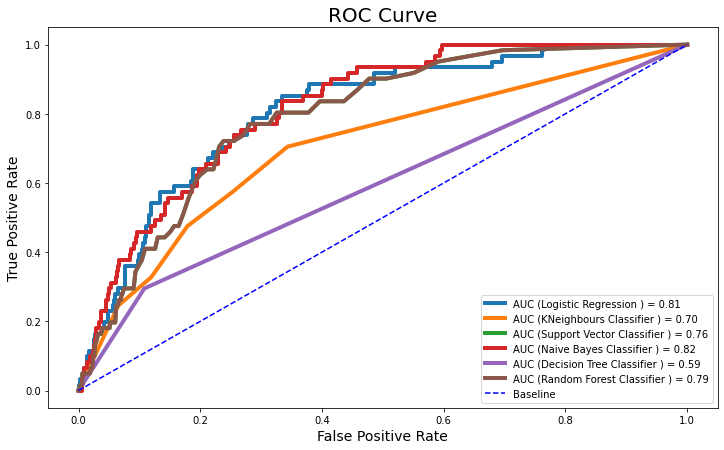

In [113]:
#  Visualize the ROC curves and calculate the AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_test = pd.Series(Y_test).replace({'Good':1, 'Bed':0})

roc_score_LR = roc_auc_score(y_test, prob_LR)
fpr_LR, tpr_LR, threshold_LR = roc_curve(y_test, prob_LR)
auc_LR = auc(fpr_LR, tpr_LR)

roc_score_KNC = roc_auc_score(y_test, prob_KNN)
fpr_KNC, tpr_KNC, threshold_KNC = roc_curve(y_test, prob_KNN)
auc_KNC = auc(fpr_KNC, tpr_KNC)

roc_score_SVC = roc_auc_score(y_test, prob_SVC)
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_test, prob_RF)
auc_RF = auc(fpr_SVC, tpr_SVC)


roc_score_NB = roc_auc_score(y_test, prob_NB)
fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test, prob_NB)
auc_NB = auc(fpr_NB, tpr_NB)

roc_score_DT = roc_auc_score(y_test, prob_DT)
fpr_DT, tpr_DT, threshold_DT = roc_curve(y_test, prob_DT)
auc_DT = auc(fpr_DT, tpr_DT)

roc_score_RF = roc_auc_score(y_test, prob_RF)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, prob_RF)
auc_RF = auc(fpr_RF, tpr_RF)


plt.figure(figsize=(12,7))
plt.plot(fpr_LR, tpr_LR, label = f'AUC (Logistic Regression ) = {roc_score_LR:.2f}', linewidth = 4)
plt.plot(fpr_KNC, tpr_KNC, label = f'AUC (KNeighbours Classifier ) = {roc_score_KNC:.2f}', linewidth = 4)
plt.plot(fpr_SVC, tpr_SVC, label = f'AUC (Support Vector Classifier ) = {roc_score_SVC:.2f}', linewidth = 4)
plt.plot(fpr_NB, tpr_NB, label = f'AUC (Naive Bayes Classifier ) = {roc_score_NB:.2f}', linewidth = 4)
plt.plot(fpr_DT, tpr_DT, label = f'AUC (Decision Tree Classifier ) = {roc_score_DT:.2f}', linewidth = 4)
plt.plot(fpr_RF, tpr_RF, label = f'AUC (Random Forest Classifier ) = {roc_score_RF:.2f}', linewidth = 4)

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

#In above classifiers we will take three classifiers which has best ROC score which are (Logisitic regression, Naive bayes and Random forest)
#We apply gridSearch on these three and take the best one as final classifier 

#Hyperparameter tunning on Logisitic Regression

In [114]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [115]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [116]:
clf.fit(X_train_std,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [117]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8046762779368685


In [123]:
logreg = LogisticRegression(C = 0.1, 
                            penalty = 'l1', 
                            solver = 'liblinear')
logreg.fit(X_train_std,Y_train)
y_pred = logreg.predict(X_test_std)
print("Accuracy:",logreg.score(X_test_std, Y_test))

Accuracy: 0.7788649706457925


#Hyperparameter tunning on Random Forest 

In [124]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [125]:
rfc=RandomForestClassifier(random_state=42)

In [126]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train_std, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [127]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [128]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [129]:
rfc1.fit(X_train_std, Y_train)
pred=rfc1.predict(X_test_std)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8052837573385518


#Grid Search on Naive Bayes

In [130]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_std, Y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.03511191734215131)


In [133]:
y_pred = nbModel_grid.predict(X_test_std)
accuracy_score(Y_test,y_pred)

0.7015655577299413

#Hence the Random forest classifier has more accuracy.